# Importing Libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Reading

In [196]:
data = pd.read_csv(r'C:\Users\original comp\Desktop\IBM\hotel_bookings.csv')

In [197]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Information about the Data

In [198]:
data.shape

(119390, 32)

we found that data consists of(11930 raws & 32 Columns)

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [200]:
data.columns.tolist()

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

# Data cleaning

# Dealing With outliers

<AxesSubplot:>

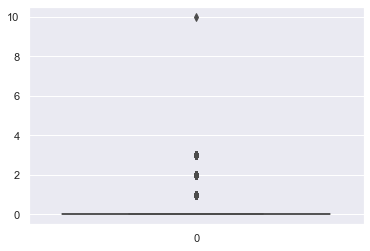

In [201]:

sns.boxplot( data = data['children'])

In [202]:
data['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

<AxesSubplot:xlabel='children', ylabel='Density'>

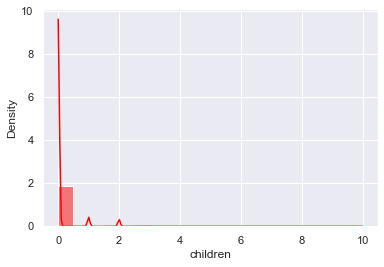

In [203]:
sns.histplot(data['children'], kde=True, stat='density' ,color='red', bins = 20)

In [204]:
q25, q50, q75 = np.percentile(data['children'], [25, 50, 75])
iqr = q75 - q50
minn = q25 - 1.5 * (iqr)
maxx = q75 + 1.5 * (iqr)

print('min =',minn)
print('q25 =',q25)
print('q50 =',q50)
print('q75 =',q75)
print('max =',maxx)

min = nan
q25 = nan
q50 = nan
q75 = nan
max = nan


In [205]:
data[data['children']>3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12


In [206]:
data.drop(index = 328 , inplace = True)

## Dealing with duplicates

In [207]:
data.duplicated().sum()

31994

In [208]:
data.drop_duplicates(inplace = True)

## Dealing With Null-Values

In [209]:
data.isnull().sum().sort_values(ascending = False)

company                           82136
agent                             12193
country                             452
children                              4
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
is_canceled                           0
market_segment                        0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
babies                                0
meal                                  0
reservation_status_date               0
distribution_channel                  0
reservation_status                    0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0


we found most of 'company' data is missing & alot of 'agent' data is missing but these two columns are not important
Moreover, we find a 4 missing data in'children'

so we need to drop columns of('company' & 'agent') and fill missing  data in (children)

In [210]:
data.drop(columns = ['company','agent'] , inplace=True)

In [211]:
data['children'].fillna(value = np.mean(data['children']), inplace = True)

In [212]:
data['country'].value_counts()

PRT    27452
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
SMR        1
NPL        1
GUY        1
VGB        1
BDI        1
Name: country, Length: 177, dtype: int64

In [213]:
data['country'].fillna('PRT', inplace = True)

In [214]:
data.isnull().sum().sum()

0

  Now, data is cleaning from (missing & duplicated & outlier) Values
-  Let's make some of exploratory data Analysis

# Some of Data Analysis

In [215]:
data['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1013
Name: reservation_status, dtype: int64

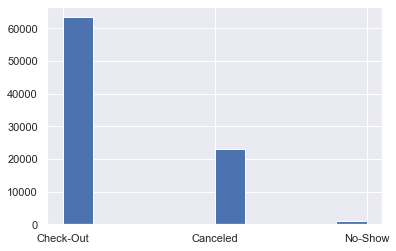

In [216]:
plt.hist(data['reservation_status'])
plt.show()

## Where do the guests come from?

In [217]:
data['country'].value_counts()

PRT    27904
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
SMR        1
NPL        1
GUY        1
VGB        1
BDI        1
Name: country, Length: 177, dtype: int64

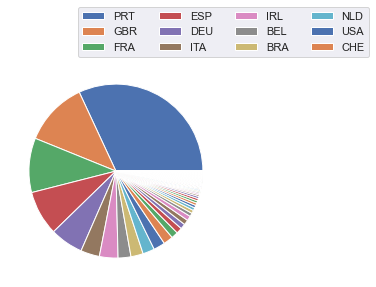

In [248]:
plt.pie(data['country'].value_counts() )
plt.legend(data['country'].value_counts().index[:12], bbox_to_anchor=(0.3, 1),ncol=4)
plt.show()

## What is the year that has more Visitors ?

In [249]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [250]:
data['arrival_date_year'].value_counts()

2016    42391
2017    31692
2015    13312
Name: arrival_date_year, dtype: int64

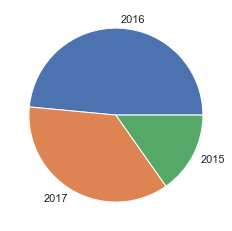

In [251]:
plt.pie(data['arrival_date_year'].value_counts(), labels =data['arrival_date_year'].value_counts().index )
plt.show()

## What is the best month to visit the Hotel

In [252]:
data['arrival_date_month'].value_counts()

August       11257
July         10056
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

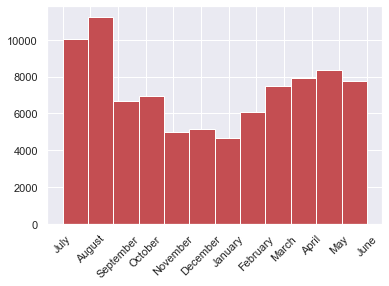

In [281]:
plt.hist(data['arrival_date_month'], bins = 12, color = 'r')
plt.xticks(rotation=45)
plt.show()

In [254]:
data['reservation_status'].value_counts()

Check-Out    63371
Canceled     23011
No-Show       1013
Name: reservation_status, dtype: int64

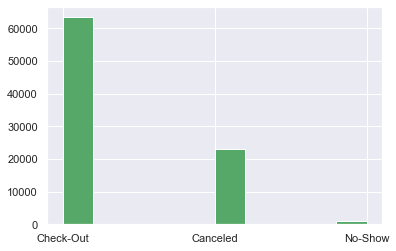

In [255]:
plt.hist(data['reservation_status'],color = 'g')
plt.show()

## How much do guests pay for a room per night?

In [306]:
data["adr_per_one"] =data["adr"] / (data["adults"] + data["children"])
full_data_guests = data[data['is_canceled']==0]
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_per_one"]].sort_values("reserved_room_type")

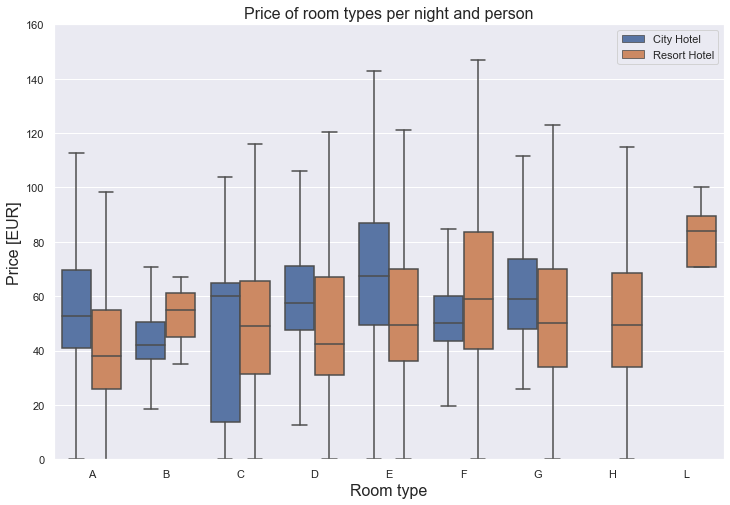

In [307]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_per_one",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

## How does the price per night vary over the year?¶


In [311]:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_per_one"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

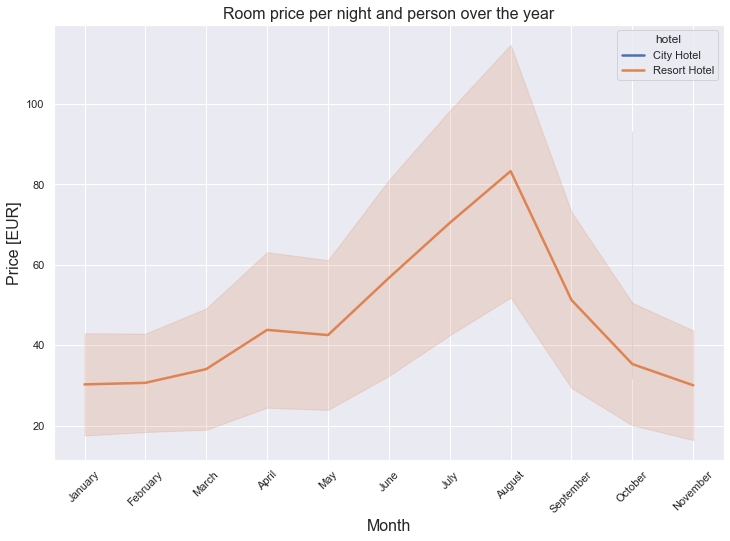

In [312]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_per_one", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

## How many bookings were canceled?


In [316]:
total_cancelations = data["is_canceled"].sum()
rh_cancelations = data.loc[data["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = data.loc[data["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / data.shape[0] * 100
rh_rel_cancel = rh_cancelations / data.loc[data["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / data.loc[data["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 24,024 (27 %)
Resort hotel bookings canceled: 7,975 (23 %)
City hotel bookings canceled: 16,049 (30 %)


# Exploratory Statistical Analysis

In [294]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_per_one
count,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87395.000000,87260.00
mean,0.274890,79.891653,2016.210310,26.838309,15.815584,1.005229,2.625310,1.875794,0.138527,0.010824,0.039075,0.030414,0.183992,0.271583,0.749574,106.336940,0.084227,0.698564,inf
std,0.446461,86.052776,0.686094,13.674648,8.835188,1.031877,2.053444,0.626504,0.454651,0.113597,0.193776,0.369147,1.731903,0.727226,10.015788,55.014193,0.281535,0.831950,NaN
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,-3.19
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000,38.00
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000,50.05
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,67.50
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,inf


# Exploratory Data Analysis

In [295]:
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,adr_per_one
is_canceled,1.000000,0.184814,0.088066,0.001440,0.005336,0.060141,0.082869,0.081814,0.067171,-0.020541,-0.089640,0.051470,-0.052152,-0.093692,0.004466,0.127979,-0.184204,-0.120554,0.051879
lead_time,0.184814,1.000000,0.139132,0.101151,0.009865,0.235166,0.310164,0.140494,0.028786,-0.003614,-0.147004,0.005374,-0.078932,0.077038,0.132152,0.023566,-0.086542,0.034241,-0.085087
arrival_date_year,0.088066,0.139132,1.000000,-0.514234,-0.010032,0.005203,0.003718,0.038624,0.041683,-0.023336,0.024339,-0.054215,0.027254,0.008653,-0.027941,0.176102,-0.039813,0.064277,0.117677
arrival_date_week_number,0.001440,0.101151,-0.514234,1.000000,0.093595,0.026864,0.027797,0.024361,0.013453,0.014260,-0.036859,0.007199,-0.020819,0.011898,0.013843,0.098279,0.008947,0.046598,0.078481
arrival_date_day_of_month,0.005336,0.009865,-0.010032,0.093595,1.000000,-0.017789,-0.028174,-0.001124,0.015956,-0.000394,-0.004179,-0.008539,0.000151,0.006319,0.006588,0.022593,0.009166,-0.001649,0.016392
stays_in_weekend_nights,0.060141,0.235166,0.005203,0.026864,-0.017789,1.000000,0.555500,0.088282,0.027916,0.013671,-0.106947,-0.020634,-0.056652,0.050241,-0.031679,0.038958,-0.042912,0.032386,-0.040574
stays_in_week_nights,0.082869,0.310164,0.003718,0.027797,-0.028174,0.555500,1.000000,0.095576,0.029670,0.016014,-0.113543,-0.018779,-0.058503,0.084955,0.001908,0.053282,-0.044294,0.037811,-0.037564
adults,0.081814,0.140494,0.038624,0.024361,-0.001124,0.088282,0.095576,1.000000,0.023735,0.016640,-0.171714,-0.042097,-0.120913,-0.048068,-0.015739,0.248999,0.007803,0.112772,-0.257431
children,0.067171,0.028786,0.041683,0.013453,0.015956,0.027916,0.029670,0.023735,1.000000,0.017492,-0.045727,-0.019240,-0.029478,0.030803,-0.020456,0.327030,0.036500,0.044635,-0.094932
babies,-0.020541,-0.003614,-0.023336,0.014260,-0.000394,0.013671,0.016014,0.016640,0.017492,1.000000,-0.012977,-0.005395,-0.009193,0.081040,-0.006840,0.023446,0.030884,0.094821,-0.001538
